# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
%matplotlib inline

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import os
import csv

In [17]:
# Import API key
from api_keys import weather_api_key
weather_api_key

'7aebcd7d949d16d73bf2b583e0271861'

In [18]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [19]:
# Output File (CSV)
output_data_file = os.path.join(os.getcwd(), "..",'output_data/cities.csv')
output_data_file

'/Users/deterding.lydia/Desktop/python-api-challenge/../output_data/cities.csv'

In [20]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [22]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [23]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [24]:
# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [26]:
# Get weather data
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': 57.5167, 'lat': -20.5167},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 71.98,
  'feels_like': 72.07,
  'temp_min': 68.36,
  'temp_max': 71.98,
  'pressure': 1023,
  'humidity': 68},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 160},
 'clouds': {'all': 40},
 'dt': 1624159850,
 'sys': {'type': 1,
  'id': 2061,
  'country': 'MU',
  'sunrise': 1624157094,
  'sunset': 1624196282},
 'timezone': 14400,
 'id': 933995,
 'name': 'Souillac',
 'cod': 200}

In [27]:
print(cities)

['qaanaaq', 'albany', 'saint-philippe', 'champerico', 'vaini', 'narsaq', 'bargal', 'pevek', 'cape town', 'sentyabrskiy', 'windsor', 'illoqqortoormiut', 'paragominas', 'chokurdakh', 'bubaque', 'rikitea', 'east london', 'castro', 'daru', 'sherbakul', 'thompson', 'khonuu', 'braganca', 'ituni', 'samusu', 'tocopilla', 'hobart', 'asau', 'nikolskoye', 'port hardy', 'galgani', 'mehamn', 'hambantota', 'belushya guba', 'perevoz', 'aripuana', 'atuona', 'ushuaia', 'san quintin', 'tsiroanomandidy', 'olafsvik', 'padang', 'ruatoria', 'hilo', 'mataura', 'palmer', 'port elizabeth', 'yuci', 'saint-leu', 'new norfolk', 'umzimvubu', 'adrar', 'aksarka', 'klaksvik', 'guerrero negro', 'mitu', 'busselton', 'husavik', 'sosua', 'tilichiki', 'longyearbyen', 'hermanus', 'tasiilaq', 'mahebourg', 'georgetown', 'barentsburg', 'nago', 'keetmanshoop', 'zonguldak', 'carnarvon', 'kaeo', 'kautokeino', 'alexandria', 'avarua', 'kaitangata', 'kahului', 'rincon', 'pontian kecil', 'jacareacanga', 'katsuura', 'mar del plata', 

In [14]:
#Perform a weather check on each city using a series of successive API calls.

In [ ]:
# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

In [28]:
# Set up lists to hold response info
city_name = []
country = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found.") 
    continue

Processing Record 1 | Qaanaaq
Processing Record 2 | Albany
Processing Record 3 | Saint-Philippe
Processing Record 4 | Champerico
Processing Record 5 | Vaini
Processing Record 6 | Narsaq
City not found.
Processing Record 7 | Pevek
Processing Record 8 | Cape Town
City not found.
Processing Record 9 | Windsor
City not found.
Processing Record 10 | Paragominas
Processing Record 11 | Chokurdakh
Processing Record 12 | Bubaque
Processing Record 13 | Rikitea
Processing Record 14 | East London
Processing Record 15 | Castro
Processing Record 16 | Daru
Processing Record 17 | Sherbakul'
Processing Record 18 | Thompson
City not found.
Processing Record 19 | Bragança
City not found.
City not found.
Processing Record 20 | Tocopilla
Processing Record 21 | Hobart
Processing Record 22 | Asău
Processing Record 23 | Nikolskoye
Processing Record 24 | Port Hardy
City not found.
Processing Record 25 | Mehamn
Processing Record 26 | Hambantota
City not found.
Processing Record 27 | Perevoz
Processing Record 28

In [29]:
# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': 57.5167, 'lat': -20.5167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 71.98, 'feels_like': 72.07, 'temp_min': 68.36, 'temp_max': 71.98, 'pressure': 1023, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 160}, 'clouds': {'all': 40}, 'dt': 1624159850, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1624157094, 'sunset': 1624196282}, 'timezone': 14400, 'id': 933995, 'name': 'Souillac', 'cod': 200}.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

In [31]:
# create a data frame
weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,77.4840,-69.3632,35.71,62,4,1.16
1,Albany,US,42.6001,-73.9662,71.47,82,99,3.96
2,Saint-Philippe,RE,-21.3585,55.7679,67.21,72,73,13.78
3,Champerico,GT,14.3000,-91.9167,82.35,78,100,4.61
4,Vaini,TO,-21.2000,-175.2000,78.96,83,20,5.75


In [32]:
# Save into a .csv
weather_data.to_csv(r'WeatherPy/weather_data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#???There are none, but how would I do it? 

In [ ]:
# Get the indices of cities that have humidity over 100%.
weather_data_clean = weather_data.get[["Humidity"] > 100]

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

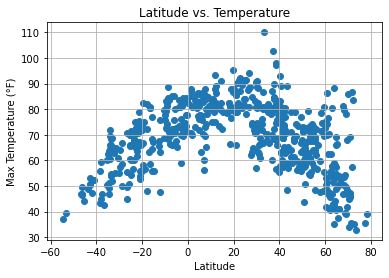

In [49]:
# Build a Latitude vs. Temperature scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")


# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy/Latitude_vs_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

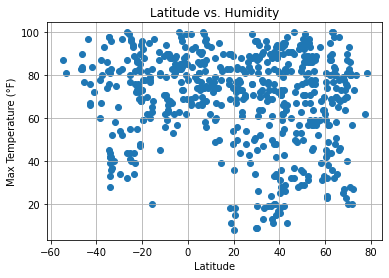

In [48]:
# Build a Latitude vs. Temperature scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy/Latitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

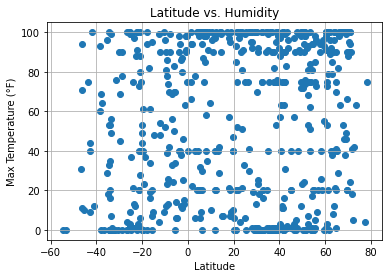

In [50]:
# Build a Latitude vs. Cloudiness scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

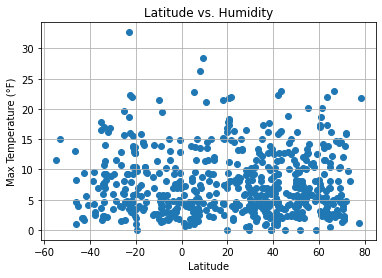

In [51]:
# Build a Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy/Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for max temp and latitude
correlation = st.pearsonr(weather_data["Max Temperature"],weather_data["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.02


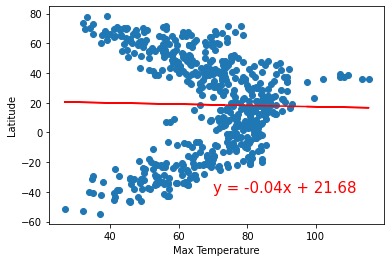

In [58]:
x_values = weather_data["Max Temperature"]
y_values = weather_data["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,-40),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [57]:
#???How do we make this different from Northern Hemisphere???
correlation = st.pearsonr(weather_data["Temperature"],weather_data[["Latitude"]<0])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

TypeError: '<' not supported between instances of 'list' and 'int'

In [ ]:
#FIX!!!!!!!
x_values = weather_data["Max Temperature"]
y_values = weather_data["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-40),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [52]:
correlation = st.pearsonr(weather_data["Humidity"],weather_data["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.17


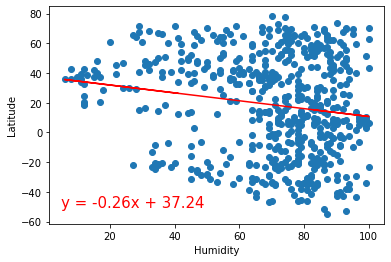

In [57]:
x_values = weather_data["Humidity"]
y_values = weather_data["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
correlation = st.pearsonr(weather_data["Humidity"],weather_data["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
x_values = weather_data["Max Temperature"]
y_values = weather_data["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-40),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [63]:
correlation = st.pearsonr(weather_data["Cloudiness"],weather_data["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.1


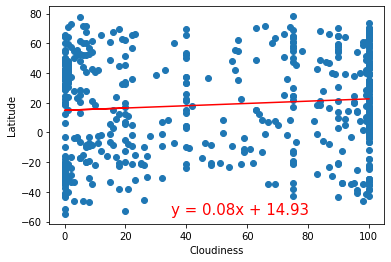

In [62]:
x_values = weather_data["Cloudiness"]
y_values = weather_data["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,-55),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
correlation = st.pearsonr(weather_data["Humidity"],weather_data["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
x_values = weather_data["Max Temperature"]
y_values = weather_data["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-40),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [64]:
correlation = st.pearsonr(weather_data["Wind Speed"],weather_data["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.05


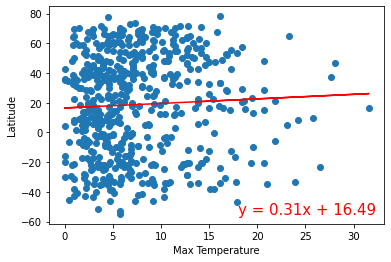

In [67]:
x_values = weather_data["Wind Speed"]
y_values = weather_data["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,-55),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
correlation = st.pearsonr(weather_data["Humidity"],weather_data["Latitude"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
x_values = weather_data["Max Temperature"]
y_values = weather_data["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-40),fontsize=15,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()